# Airbnb as investment decision data

For this project, I was interestested in using Airbnb data from 2021 to help investors get involved with investing with Airbnb.
There were three primary questions I wanted the data to answer:
1) What areas made suitable investment areas for Airbnb owners? - this was done by looking at the most areas with the most Airbnb rentals.
2) What type of properties do Airbnb owners typically purchase?
3) How much could we charge per area, on average, and what were the drivers for the price?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_r =pd.read_csv('reviews.csv')
df_l=pd.read_csv('listings.csv')
df_c=pd.read_csv('calendar.csv')

In [3]:
#lets investigate the data/comuns:
#df_r
df_l.columns
#df_c

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
#get data types and column names
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
(df_l.dtypes).value_counts()

object     62
float64    17
int64      13
dtype: int64

# Data Cleanup

Cleanup of the data...
1. Remove columns with no data
2. Drop columns with only one value... these columns will provide no additional information so can be removed
3. Remove rows for some columns with missing data

Note for now we won't be adding values to the columns missing data...in the context of Ab&B data, doing this might skew the data. If it looks like the data we get will is conflicting and confusing we can revisit this part to cleanup and improve the data.

In [6]:
df_l.shape

(3818, 92)

In [7]:
#1.Remove columns with NAN
df_l.dropna(how='all', axis=1, inplace=True)

#2. Remove columns with only 1 value throughout the column
nunique = df_l.nunique()
cols_to_drop = nunique[nunique == 1].index
df_l.drop(cols_to_drop, axis=1)

#3.drop rows with NAN for some subsets... edit this list if you want to include other subsets that you feel will
#improve the data
df_l.dropna(subset=['property_type','neighbourhood'],axis=0,inplace=True)

In [8]:
#Lets determine how many rows we lost - hopefully not too much!
df_l.shape

(3401, 91)

# Calculating The Number of AirB&B Rentals per NeighbourHood

<AxesSubplot:xlabel='neighbourhood'>

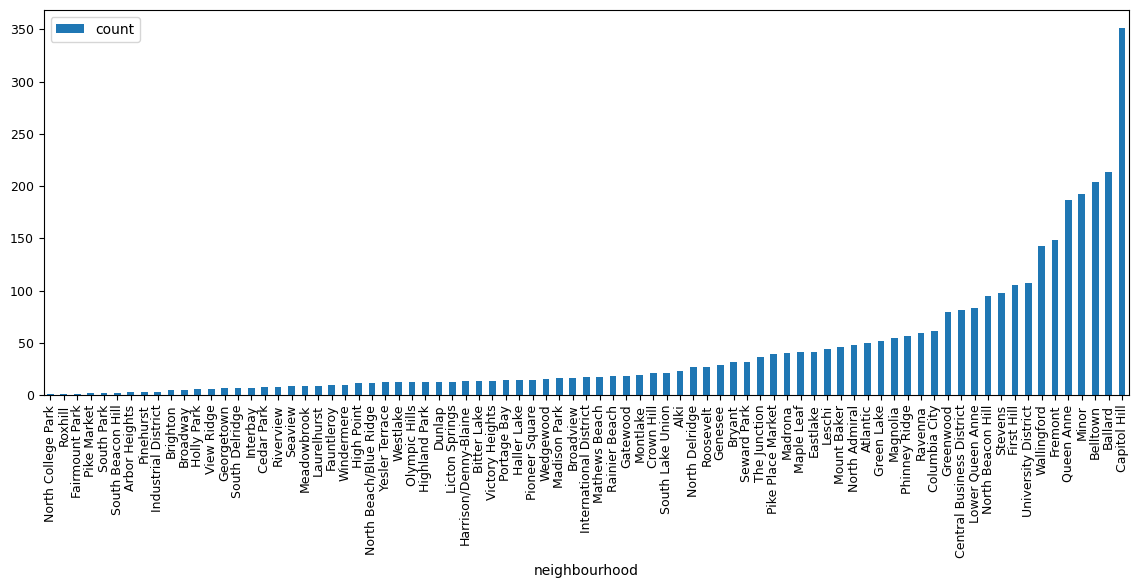

In [9]:
neighbycount=df_l.groupby('neighbourhood', as_index=False)['id'].count()
neighbycount.rename(columns={'id':'count'}, inplace=True)
neighbycount.sort_values(by=['count'], inplace=True)
neighbycount.plot(x='neighbourhood', y='count',kind='bar', figsize=(14,5), fontsize=9)

# Calculating the Average Price per Day for each neighbourhood

C:\Users\CarlW\AppData\Local\Temp\ipykernel_19180\4191475514.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_l['price'] = df_l['price'].str.replace('$','').str.replace(',','').astype(float)


<AxesSubplot:xlabel='neighbourhood'>

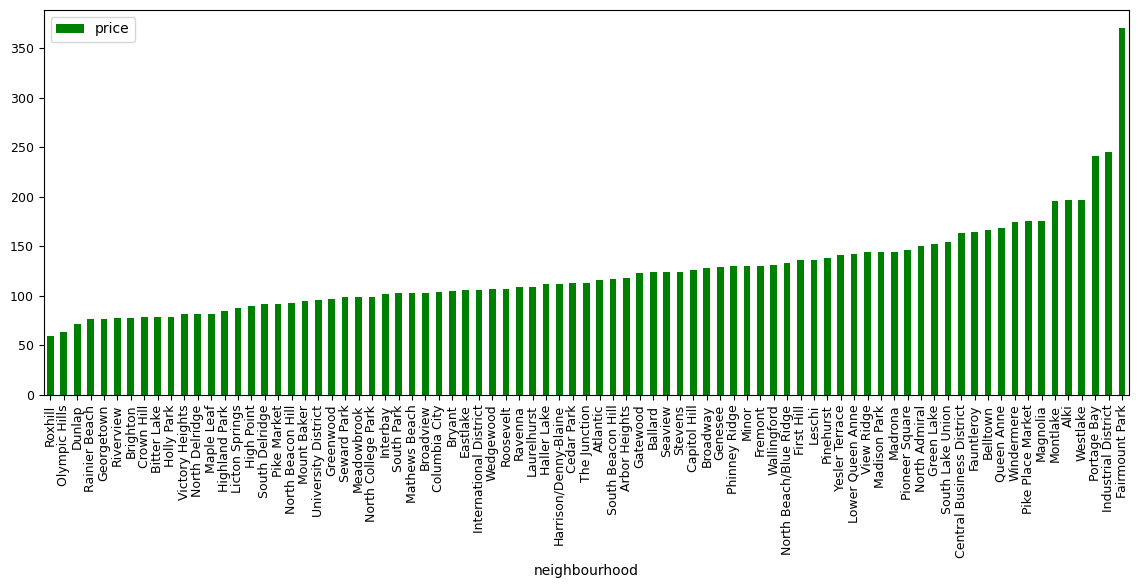

In [10]:
df_l['price'] = df_l['price'].str.replace('$','').str.replace(',','').astype(float)
avgprice=df_l.groupby('neighbourhood', as_index=False)['price'].mean()
avgprice.sort_values(by=['price'], inplace=True)
avgprice.plot(x='neighbourhood', y='price',kind='bar', figsize=(14,5), fontsize=9, color='green')


# Minimum Reviewed Scores by Neighbourhood

<AxesSubplot:xlabel='neighbourhood'>

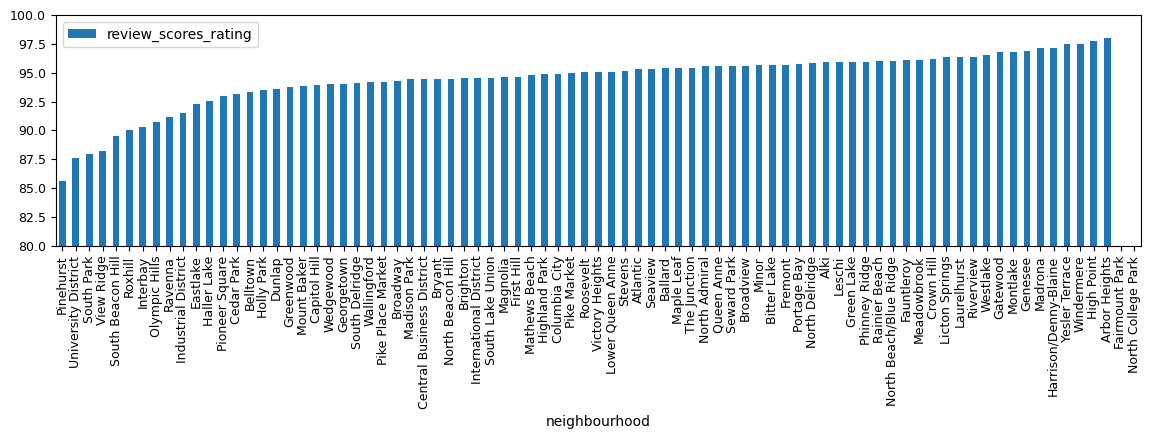

In [11]:
reviewscores=df_l.groupby('neighbourhood', as_index=False)['review_scores_rating'].mean()
reviewscores.sort_values(by=['review_scores_rating'], inplace=True)
reviewscores.plot(x='neighbourhood', y='review_scores_rating', kind='bar', figsize=(14,3), fontsize=9, ylim=(80,100))

# Calculating average availability by day for each area

In [12]:
#Get total counts for availability by listing id
avail=(df_c[df_c.available=='t'].groupby('listing_id',as_index=False))['available'].value_counts()
avail.rename(columns={'listing_id':'id'}, inplace=True)

#get neighbourhood with corresponding id
neighbor=df_l[['id','neighbourhood']].sort_values(by='id')
neighboravail=pd.merge(avail,neighbor,how='outer', on='id')

#cleanup merge table, drop the "available column, it will only have a value of "t" - replace NAN in rows with 0
neighboravail.drop('available',axis=1, inplace=True)
neighboravail.fillna(0, inplace=True)
neighboravail

id  count     neighbourhood
0         3335  309.0                 0
1         4291  365.0         Roosevelt
2         5682  309.0    South Delridge
3         6606  365.0       Wallingford
4         7369   53.0          Broadway
...        ...    ...               ...
3805   9975073    0.0  Lower Queen Anne
3806  10015967    0.0      The Junction
3807  10020782    0.0      The Junction
3808  10035274    0.0      Capitol Hill
3809  10339144    0.0      Capitol Hill

[3810 rows x 3 columns]

<AxesSubplot:xlabel='neighbourhood'>

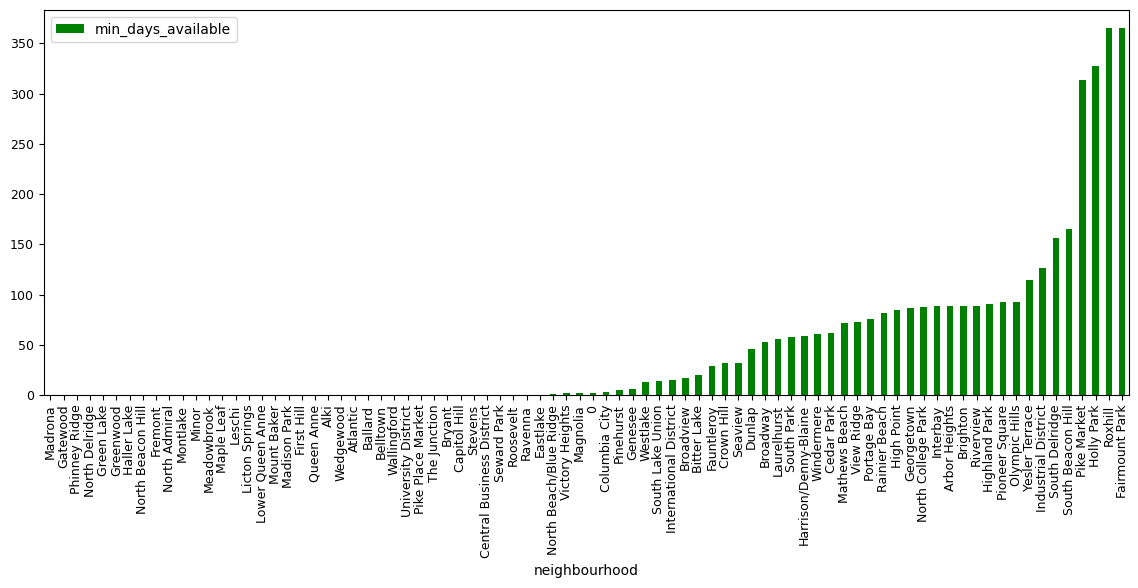

In [13]:
#This calculation provides the minimun number of days for properties for a given area. Change the .min() function for .mean() to get the mean() average.
availabilitybyarea=neighboravail.groupby('neighbourhood', as_index=False)['count'].min()
availabilitybyarea.sort_values(by=['count'], inplace=True)
availabilitybyarea.rename(columns={'count':'min_days_available'}, inplace=True)
availabilitybyarea.plot(x='neighbourhood', y='min_days_available', kind='bar', figsize=(14,5), fontsize=9, color='green')

<AxesSubplot:xlabel='date'>

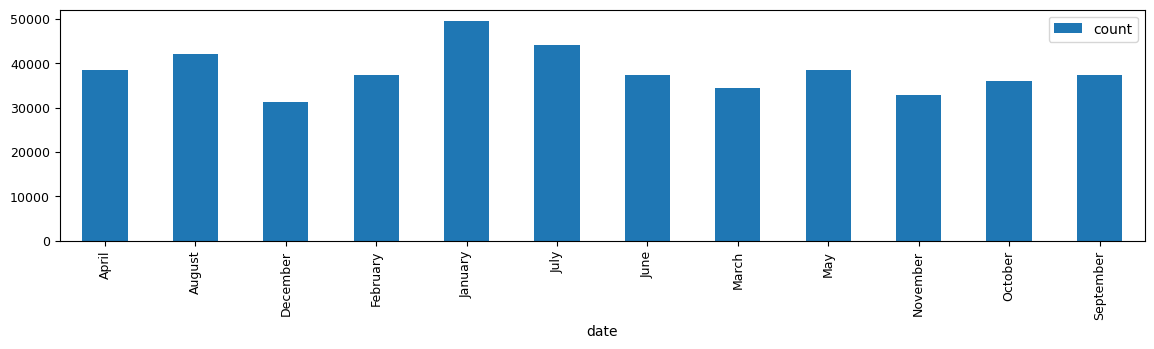

In [14]:
df_c['date'] = pd.to_datetime(df_c['date'])
dateby=(df_c[df_c.available=='f'].groupby(df_c['date'].dt.strftime('%B'),as_index=False))['available'].value_counts().sort_index()
dateby.plot(x='date', y='count', kind='bar', figsize=(14,3), fontsize=9)

# Distribution of Property Type by neighbor hood 

This section will help us determine which properties Airbnb owners typically invest in.

<AxesSubplot:xlabel='neighbourhood'>

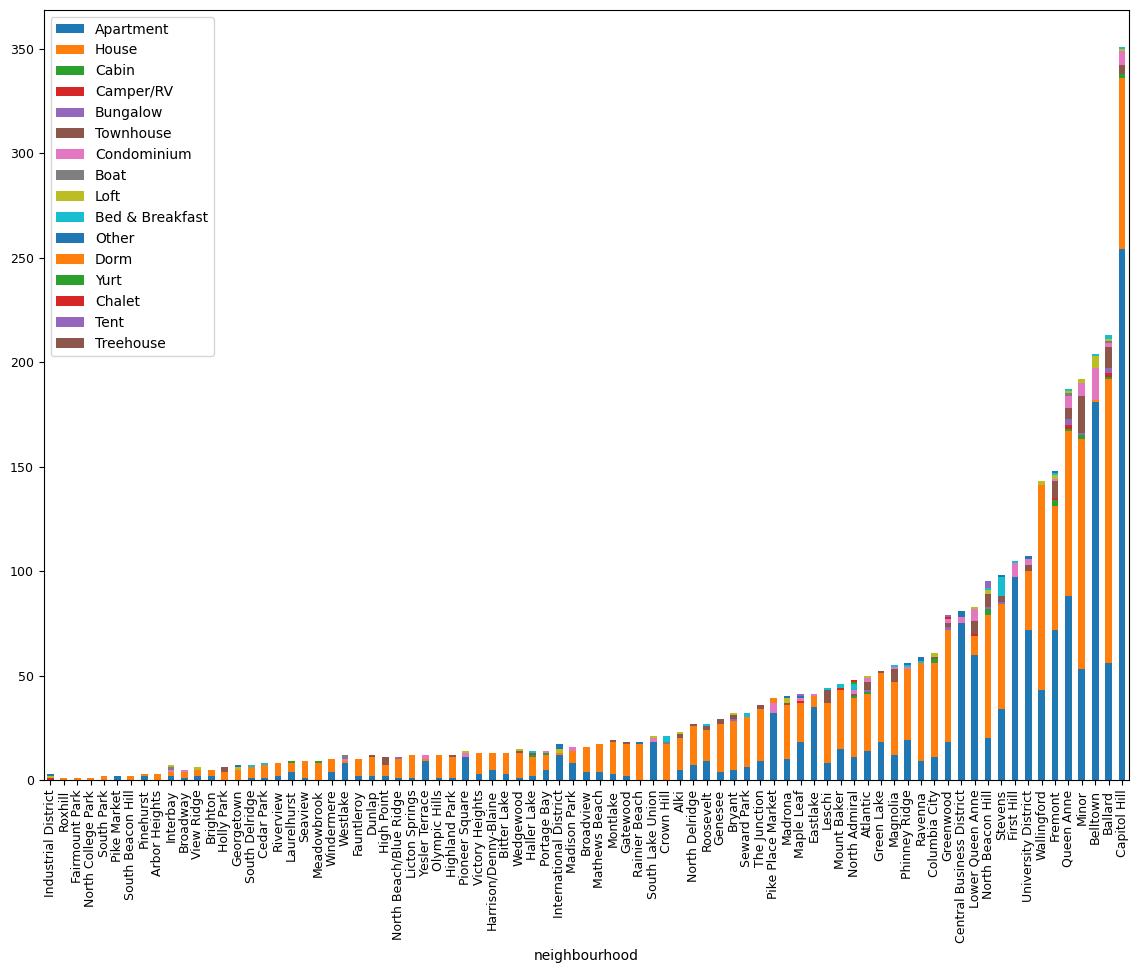

In [15]:
#lets get an array of all the property types, use unique to remove the duplicates from the list
aparttypes=df_l['property_type'].unique() 
#create an array that will store the list of Dataframes that will be created... we will use this to merge the list into one DF
arr=[]
i=0

#loop through property types, get by neighbourhood counts and store in array arr
for apt in aparttypes:
    arr.append(df_l[df_l.property_type==apt].groupby('neighbourhood',as_index=False)['property_type'].value_counts())
    arr[i].rename(columns={'count':apt}, inplace=True)
    arr[i].drop('property_type', axis=1, inplace=True)
    i+=1

#creat larger DF from all DF stored in arr
listofproperties=pd.merge(arr[0],arr[1], how='outer',on='neighbourhood')
for i in range(2,16,1):
    listofproperties=pd.merge(listofproperties,arr[i], how='outer',on='neighbourhood')

listofproperties.fillna(0, inplace=True)

#horizontal addition of all property type values and add at the end of the DF
listofproperties['total_property']= listofproperties['Bungalow']+listofproperties['Apartment']+listofproperties['House']+listofproperties['Cabin']+listofproperties['Townhouse']+listofproperties['Other']+listofproperties['Condominium']++listofproperties['Bed & Breakfast']

#great we can now sort the values by the Total property count - this makes it easier to match to the property count by neighbourhood
listofproperties.sort_values(by=['total_property'], inplace=True)
listofproperties.plot(x='neighbourhood', y=aparttypes,kind="bar", rot=90, stacked=True, figsize=(14,10), fontsize=9) 

In [16]:
df_l.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.401000e+03  3.401000e+03  3.401000e+03          3399.000000   
mean   5.360162e+06  2.016010e+13  1.526911e+07             7.156517   
std    2.982572e+06  0.000000e+00  1.449196e+07            28.329905   
min    4.291000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    2.926776e+06  2.016010e+13  3.074414e+06             1.000000   
50%    5.728739e+06  2.016010e+13  9.791687e+06             1.000000   
75%    7.902137e+06  2.016010e+13  2.490289e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3399.000000  3401.000000  3401.000000   3401.000000   
mean                    7.156517    47.629388  -122.332890      3.378712   
std                    28.329905     0.042792     0.031683      1.991616   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609798  -122.354343      2.000000   
50%                     1.000000    47.623883  -122.328863      3.000000   
75%                     3.000000    47.663040  -122.310483      4.000000   
max                   502.000000    47.733358  -122.252230     16.000000   

         bathrooms     bedrooms  ...  number_of_reviews  review_scores_rating  \
count  3385.000000  3395.000000  ...        3401.000000           2866.000000   
mean      1.266027     1.320177  ...          23.578359             94.589323   
std       0.599865     0.885782  ...          39.213358              6.404668   
min       0.000000     0.000000  ...           0.000000             20.000000   
25%       1.000000     1.000000  ...           2.000000             93.000000   
50%       1.000000     1.000000  ...          10.000000             96.000000   
75%       1.000000     2.000000  ...          28.000000             99.000000   
max       8.000000     6.000000  ...         474.000000            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             2856.000000                2861.000000   
mean                 9.647759                   9.559245   
std                  0.665288                   0.794916   
min                  2.000000                   3.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            2856.000000                  2862.000000   
mean                9.786765                     9.815514   
std                 0.603881                     0.557304   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  \
count             2858.000000          2858.000000   
mean                 9.608817             9.459062   
std                  0.630198             0.736971   
min                  4.000000             2.000000   
25%                  9.000000             9.000000   
50%                 10.000000            10.000000   
75%                 10.000000            10.000000   
max                 10.000000            10.000000   

       calculated_host_listings_count  reviews_per_month  
count                     3401.000000        2882.000000  
mean                         2.960600           2.066568  
std                          5.893135           1.814703  
min                          1.000000           0.020000  
25%                          1.000000           0.680000  
50%                  

# Finding the Price Drivers

In [23]:
#extract all the columns that hold data. A subset of these will be used to search for price drivers through the correlation functiion
datacols=df_l.select_dtypes(['float'],['int']).columns
datacols

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [18]:
#select the columns that you want to correlate with price
cordat=df_l[['accommodates','bathrooms','bedrooms','price','review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [19]:
cordat.dropna()

accommodates  bathrooms  bedrooms  price  review_scores_rating  \
0                4        1.0       1.0   85.0                  95.0   
1                4        1.0       1.0  150.0                  96.0   
2               11        4.5       5.0  975.0                  97.0   
4                6        2.0       3.0  450.0                  92.0   
5                2        1.0       1.0  120.0                  95.0   
...            ...        ...       ...    ...                   ...   
3810             5        1.0       2.0  154.0                  92.0   
3811             3        1.0       1.0   65.0                 100.0   
3812             4        1.0       1.0   95.0                  96.0   
3813             6        2.0       3.0  359.0                  80.0   
3814             4        1.0       1.0   79.0                 100.0   

      review_scores_cleanliness  review_scores_checkin  \
0                          10.0                   10.0   
1                          10.0                   10.0   
2                          10.0                   10.0   
4                           9.0                   10.0   
5                          10.0                   10.0   
...                         ...                    ...   
3810                        8.0                   10.0   
3811                        8.0                   10.0   
3812                       10.0                   10.0   
3813                       10.0                    4.0   
3814                       10.0                   10.0   

      review_scores_communication  review_scores_location  review_scores_value  
0                            10.0                     9.0                 10.0  
1                            10.0                    10.0                 10.0  
2                            10.0                    10.0                 10.0  
4                            10.0                     9.0                  9.0  
5                            10.0                    10.0                 10.0  
...                           ...                     ...                  ...  
3810                         10.0                    10.0                  8.0  
3811                         10.0                    10.0                 10.0  
3812                         10.0                     9.0                 10.0  
3813                          8.0                    10.0                  8.0  
3814                         10.0                    10.0                 10.0  

[2838 rows x 10 columns]

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>],
       [<AxesSubplot:title={'center':'review_scores_checkin'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>],
       [<AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

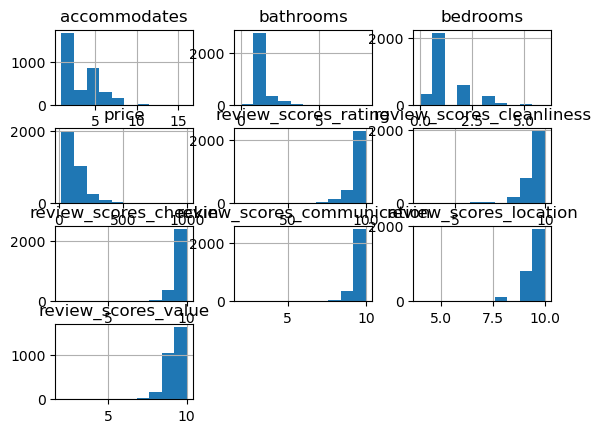

In [20]:
cordat.hist()

<AxesSubplot:>

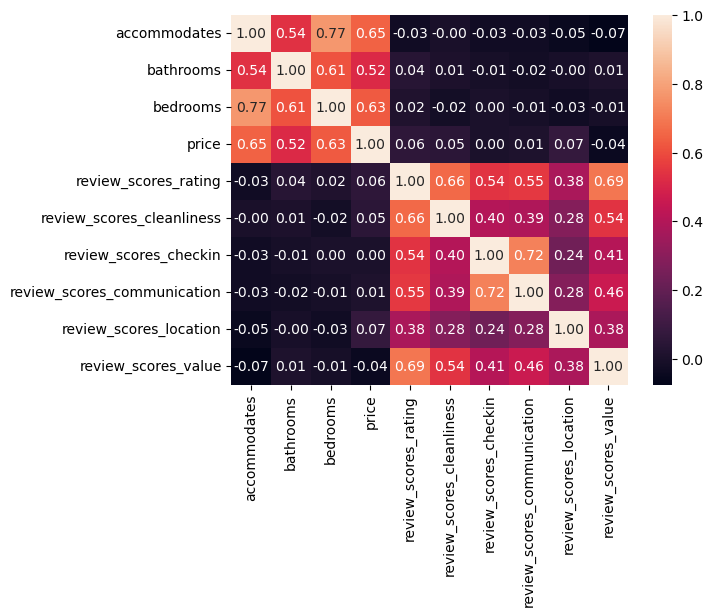

In [24]:
sns.heatmap(cordat.corr(), annot=True, fmt='.2f')

Price seems to be correlated with number of persons to accomodate, number of bedrooms and bathrooms.